# Project - S&P 500 Data
---


## Table of Contents

1. Preliminiary Code
2. Data Description
3. Readings - Papers
4. Explanatory Data Analysis of Securities.csv
   * Data Cleaning
   * Graphs:
     * Number of Securities by Sector in the S&P 500 index
     * Number of Securities by Subsector in the S&P 500 index
     * Number of Securities by Region in the S&P 500 index
     * Arrival of Securities to the S&P500 index + Number of securities by year of joining the Index
   * Observation and results
5. Explanatory Data Analysis of prices-split-adjusted.csv
   1. S&P 500 Equal Weight Index by stock price
      * Graph
   2. Stocks Returns
      * Calculating the Returns
      * Graphs:
        * Top & Worst performing stocks in S&P 500 between 01.2010 and 12.2016
        * Market (S&P 500 weighted index) performance over these 7 years. - based on returns to check the one derived on prices
        * NETLIX stock performance - best stock performance over these 7 years
        * Transocean Stock performance - worst stock performance duting these 7 years
      * Observations and results
   3. Stocks Correlations
      * Graphs: 
        * Correlation Heatmap in monotonic order of the Fiedler vector elements
      * Highest and lowest correlations between stocks
      * Observations and results
   4. Sectors Return
      * Graphs:
        * Sectors performances between 01.2010 and 12.2016.
        * Daily, annualised and total 7-year returns for each Sector
      * Observations and results
   5. Sectors Correlation
      * Graphs:
        * Correlation Heatmap in in monotonic order of the Fiedler vector elements 
      * Highest and lowest correlations between Sectors
      * Observations and results
6. Explanatory Data Analysis of fundamentals.csv 
   * Data Manipulations
   * Graphs:
     * Income and Statement of Financial Position analysis
     * Key Ratios
   * Observations and results
7. Machine Learning Techniques
   * Readings
   * Long Short Term Memory (LSTM) - Neural Network Model
   * Observations and results

---
# 1. Prelimiary Code  

--- 

In [1]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [2]:

import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter, YearLocator, MonthLocator
import matplotlib.dates as mdates
%matplotlib inline

import seaborn as sns
sns.reset_orig() # don't change the style of plots

import glob
import datetime
import warnings
warnings.filterwarnings('ignore')

In [3]:
os.chdir(r"C:\Users\Michal\Documents\01 - Master Degree\ST445 Managing and Visualizing data\project-heymic\nyse")


---
# 2. Data Description
---

* Lets go through all the data files that we are are given and see want information we are given.
* prices-split-adjusted.csv is a adjusted file for the prices.csv where it reflects the changes in stock price due to stock split or public offerings. - in our analysis we will only focus on the adjusted data - i.e prices-split-adjusted.csv

**General Note:**  
To make the code cleaner the suffixes of the variables stand for:  
* _df = Pandas Dataframe  
* _S = Pandas Series
* _list = list

In [4]:
csv_files = glob.glob('*.csv')
csv_files

['fundamentals.csv',
 'prices-split-adjusted.csv',
 'prices.csv',
 'securities.csv']

In [5]:
# Fundamentals
fundamentals_df = pd.read_csv(csv_files[0], index_col = 0)
fundamentals_df.head(2)

Ticker Symbol Period Ending  Accounts Payable  Accounts Receivable  \
0           AAL    2012-12-31      3.068000e+09         -222000000.0   
1           AAL    2013-12-31      4.975000e+09          -93000000.0   

   Add'l income/expense items  After Tax ROE  Capital Expenditures  \
0               -1.961000e+09           23.0         -1.888000e+09   
1               -2.723000e+09           67.0         -3.114000e+09   

   Capital Surplus  Cash Ratio  Cash and Cash Equivalents  \
0     4.695000e+09        53.0               1.330000e+09   
1     1.059200e+10        75.0               2.175000e+09   

               ...               Total Current Assets  \
0              ...                       7.072000e+09   
1              ...                       1.432300e+10   

   Total Current Liabilities  Total Equity  Total Liabilities  \
0               9.011000e+09 -7.987000e+09       2.489100e+10   
1               1.380600e+10 -2.731000e+09       4.500900e+10   

   Total Liabilities & Equity  Total Revenue  Treasury Stock  For Year  \
0                1.690400e+10   2.485500e+10    -367000000.0    2012.0   
1                4.227800e+10   2.674300e+10             0.0    2013.0   

   Earnings Per Share  Estimated Shares Outstanding  
0               -5.60                  3.350000e+08  
1              -11.25                  1.630222e+08  

[2 rows x 78 columns]

In [6]:
fundamentals_df.columns

Index(['Ticker Symbol', 'Period Ending', 'Accounts Payable',
       'Accounts Receivable', 'Add'l income/expense items', 'After Tax ROE',
       'Capital Expenditures', 'Capital Surplus', 'Cash Ratio',
       'Cash and Cash Equivalents', 'Changes in Inventories', 'Common Stocks',
       'Cost of Revenue', 'Current Ratio', 'Deferred Asset Charges',
       'Deferred Liability Charges', 'Depreciation',
       'Earnings Before Interest and Tax', 'Earnings Before Tax',
       'Effect of Exchange Rate',
       'Equity Earnings/Loss Unconsolidated Subsidiary', 'Fixed Assets',
       'Goodwill', 'Gross Margin', 'Gross Profit', 'Income Tax',
       'Intangible Assets', 'Interest Expense', 'Inventory', 'Investments',
       'Liabilities', 'Long-Term Debt', 'Long-Term Investments',
       'Minority Interest', 'Misc. Stocks', 'Net Borrowings', 'Net Cash Flow',
       'Net Cash Flow-Operating', 'Net Cash Flows-Financing',
       'Net Cash Flows-Investing', 'Net Income', 'Net Income Adjustments',
  

In [7]:
#prices-split-adjusted
prices_split_adjusted_df = pd.read_csv(csv_files[1], index_col = 0, parse_dates = True)
prices_split_adjusted_df.head(2)

symbol        open       close         low        high     volume
date                                                                        
2016-01-05   WLTW  123.430000  125.839996  122.309998  126.250000  2163600.0
2016-01-06   WLTW  125.239998  119.980003  119.940002  125.540001  2386400.0

In [8]:
securities_df = pd.read_csv(csv_files[3], parse_dates = True)
securities_df.head(2)

Ticker symbol             Security SEC filings  GICS Sector  \
0           MMM           3M Company     reports  Industrials   
1           ABT  Abbott Laboratories     reports  Health Care   

          GICS Sub Industry  Address of Headquarters Date first added    CIK  
0  Industrial Conglomerates      St. Paul, Minnesota              NaN  66740  
1     Health Care Equipment  North Chicago, Illinois       1964-03-31   1800

---

**Fundamentals.csv**
* Fundamentals.csv contain yearly data on the Financial indicators of companies listed on the S&P 500 index. 
* These indicators taken from Financial Statements and are publicly known.
* Look above for columns in the Fundamentals

**Prices-split-adjusted.csv**
* Prices-split-adjusted.csv contain daily stock prices (open, close, low, high) and there coresponding volume for the companies listed on the S&P500
* The Prices are noted from the begining of 2010 to the end of 2016.
* Some stocks were not listed in the S&P 500 index from the beginning of 2010, so there are recorded later. For Example Facebook (FB) joined the S&P 500 index in Dec 2013 [link](http://www.businessinsider.com/facebook-stock-sp-500-2013-12?IR=T)  
  
  
Prices-split-adjusted MetaData:
  * date : date of the record
  * symbol : Name of the Security
  * open : opening stock srice on the day
  * close : closing stock price on the day
  * low : lowest stock price on the day
  * high : highest stock price on the day
  * volume : volume in daily trades on the day

** Securities.csv **
* Securities.csv contains the general information about the Companies, which stock is listed on the S&P 500 index.

Securities MetaData:
  * Ticker Symbol : Symbol of the stock
  * Security : Name of the security
  * SEC Fillings : Source
  * GICS Sector : Sector to which the firm belongs to
  * GICS Sub Industry : Subsector to which the firm belongs to
  * Address of Headquarter : Address of headquarter
  * Date First Added : Day of adding to the S&P 500
  * CIK : Stock indentification number




---
# 3. Explanatory Data Analysis of Securities.csv
---

---
### Data Cleaning
---

In [9]:
securities_df.head(2)

Ticker symbol             Security SEC filings  GICS Sector  \
0           MMM           3M Company     reports  Industrials   
1           ABT  Abbott Laboratories     reports  Health Care   

          GICS Sub Industry  Address of Headquarters Date first added    CIK  
0  Industrial Conglomerates      St. Paul, Minnesota              NaN  66740  
1     Health Care Equipment  North Chicago, Illinois       1964-03-31   1800

In [10]:
#Checking the missing values
securities_df.isnull().sum()

Ticker symbol                0
Security                     0
SEC filings                  0
GICS Sector                  0
GICS Sub Industry            0
Address of Headquarters      0
Date first added           198
CIK                          0
dtype: int64

In [11]:
print("Number of Securities:", securities_df["Security"].nunique())
print("Number of Ticker Symbols:", securities_df["Ticker symbol"].nunique())
print("---------------")
print("We have encountered a small problem, it seems that one Security has two different Ticker symbols")
print("Lets investigate it further")

Number of Securities: 504
Number of Ticker Symbols: 505
---------------
We have encountered a small problem, it seems that one Security has two different Ticker symbols
Lets investigate it further


In [12]:
securities_df[securities_df.Security.duplicated()]

Ticker symbol      Security SEC filings             GICS Sector  \
456           UAA  Under Armour     reports  Consumer Discretionary   

                       GICS Sub Industry Address of Headquarters  \
456  Apparel, Accessories & Luxury Goods     Baltimore, Maryland   

    Date first added      CIK  
456       2016-03-25  1336917

In [13]:
securities_df[securities_df.Security == "Under Armour"]

Ticker symbol      Security SEC filings             GICS Sector  \
455            UA  Under Armour     reports  Consumer Discretionary   
456           UAA  Under Armour     reports  Consumer Discretionary   

                       GICS Sub Industry Address of Headquarters  \
455  Apparel, Accessories & Luxury Goods     Baltimore, Maryland   
456  Apparel, Accessories & Luxury Goods     Baltimore, Maryland   

    Date first added      CIK  
455       2014-05-01  1336917  
456       2016-03-25  1336917

**Researching on the internet:** 
* UA stock, formerly trading under the UA.C symbol, stands for Class C shares, with no voting rights. 
* UAA stock, formerly trading under the symbol UA, stands for Class A shares, which confer one vote per share to the owner.  

-> lets change accrodingly. Use Alphabet Security Notation as the example.

In [14]:
securities_df.loc[[23,24],:]

Ticker symbol              Security SEC filings             GICS Sector  \
23         GOOGL  Alphabet Inc Class A     reports  Information Technology   
24          GOOG  Alphabet Inc Class C     reports  Information Technology   

               GICS Sub Industry    Address of Headquarters Date first added  \
23  Internet Software & Services  Mountain View, California       2014-04-03   
24  Internet Software & Services  Mountain View, California              NaN   

        CIK  
23  1652044  
24  1652044

In [15]:
securities_df.loc[455, "Security"]  = "Under Armour Class C"
securities_df.loc[456, "Security"]  = "Under Armour Class A"

In [16]:
#check:
print("Number of Securities:", securities_df["Security"].nunique())
print("Number of Ticker Symbols:", securities_df["Ticker symbol"].nunique())
#ok!

Number of Securities: 505
Number of Ticker Symbols: 505


---
### Graphs:
* Number of Securities by Sector in the S&P 500 index
* Number of Securities by Subsector in the S&P 500 index
* Number of Securities by Region in the S&P 500 index
* Arrival of Securities to the S&P500 index + Number of securities by year of joining the Index
---

In [17]:
## Grouping the Securities by Sector
securities_by_sector_S = securities_df.groupby("GICS Sector")["Ticker symbol"].count().sort_values(ascending = False)
securities_by_sector_S

GICS Sector
Consumer Discretionary         85
Industrials                    69
Information Technology         68
Financials                     64
Health Care                    59
Consumer Staples               37
Energy                         36
Real Estate                    29
Utilities                      28
Materials                      25
Telecommunications Services     5
Name: Ticker symbol, dtype: int64

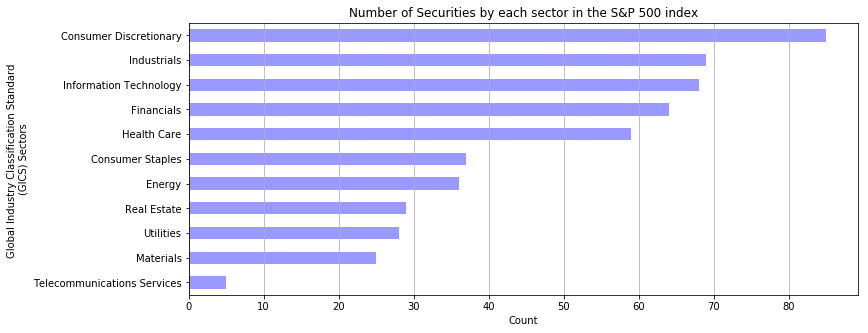

In [18]:
## Ploting the number of securities in each Sector.
fig, ax = plt.subplots(figsize=(12, 5))

securities_by_sector_S.sort_values(ascending = True).plot(kind='barh', color='b', alpha=0.4, ax=ax)
ax.set_title("Number of Securities by each sector in the S&P 500 index")
ax.set_xlabel("Count")
ax.set_ylabel("Global Industry Classification Standard \n(GICS) Sectors");
ax.xaxis.grid(True)

In [19]:
## Grouping the Securities by Subsector
securities_by_subsector_S = securities_df.groupby("GICS Sub Industry")["Ticker symbol"].count().sort_values(ascending = False)
print("The number of Securities Subsectors in S&P500 index is:", len(securities_by_subsector_S))

The number of Securities Subsectors in S&P500 index is: 124


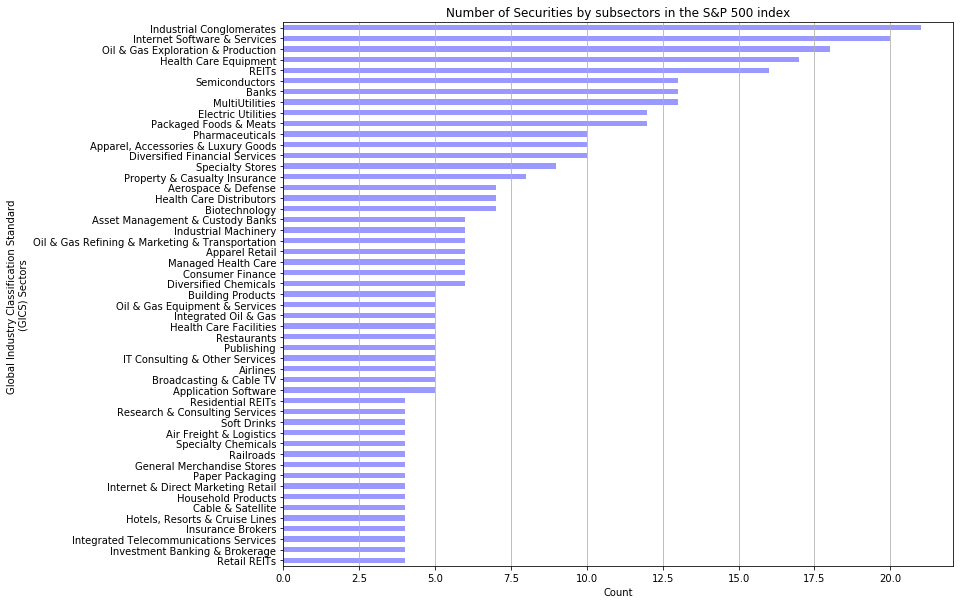

In [20]:
# plotting the subsector if more than 4 Securities in SubSectors.
securities_by_subsector_top_S = securities_by_subsector_S[securities_by_subsector_S >= 4]

fig, ax = plt.subplots(figsize=(12, 10))
 
securities_by_subsector_top_S.sort_values(ascending = True).plot(kind='barh', color='b', alpha=0.4, ax=ax)
ax.set_title("Number of Securities by subsectors in the S&P 500 index")
ax.set_xlabel("Count")
ax.set_ylabel("Global Industry Classification Standard \n(GICS) Sectors");
ax.xaxis.grid(True)

In [21]:
## Looking at the place of registration of each Firm. The REGION where each firm is based
addresses_full_list = list(securities_df["Address of Headquarters"].str.split(","))

## Appending the State/Region/Country to a list
addresses_list = []
for sublist in addresses_full_list:
    addresses_list.append(sublist[-1])

In [22]:
address_S = pd.Series(addresses_list).value_counts()
print(address_S.head(2))

 California    67
 New York      60
dtype: int64


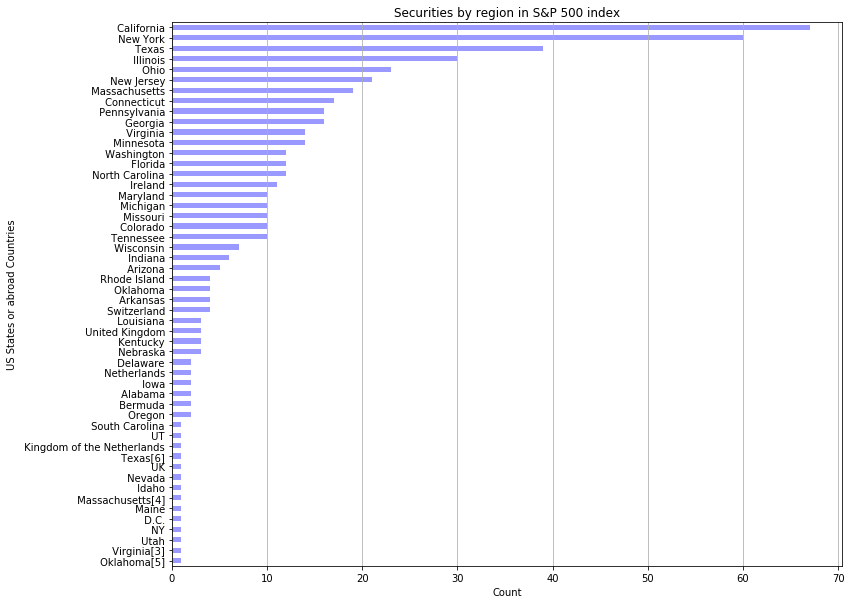

In [23]:
## Plotting the Securities by Region
fig, ax = plt.subplots(figsize=(12, 10))

address_S.sort_values(ascending = True).plot(kind='barh', color='b', alpha=0.4, ax=ax)
ax.set_title("Securities by region in S&P 500 index")
ax.set_xlabel("Count")
ax.set_ylabel("US States or abroad Countries");
ax.xaxis.grid(True)

In [24]:
## Searching for the first time a Secutirity was added/noted on the S&P 500 index
Securities_dates_add_S = securities_df["Date first added"].dropna().sort_values().reset_index(drop = True)

Securities_dates_add_S =  pd.to_datetime(Securities_dates_add_S, infer_datetime_format=True)
Securities_dates_add_by_year_S = Securities_dates_add_S.dt.year.value_counts()

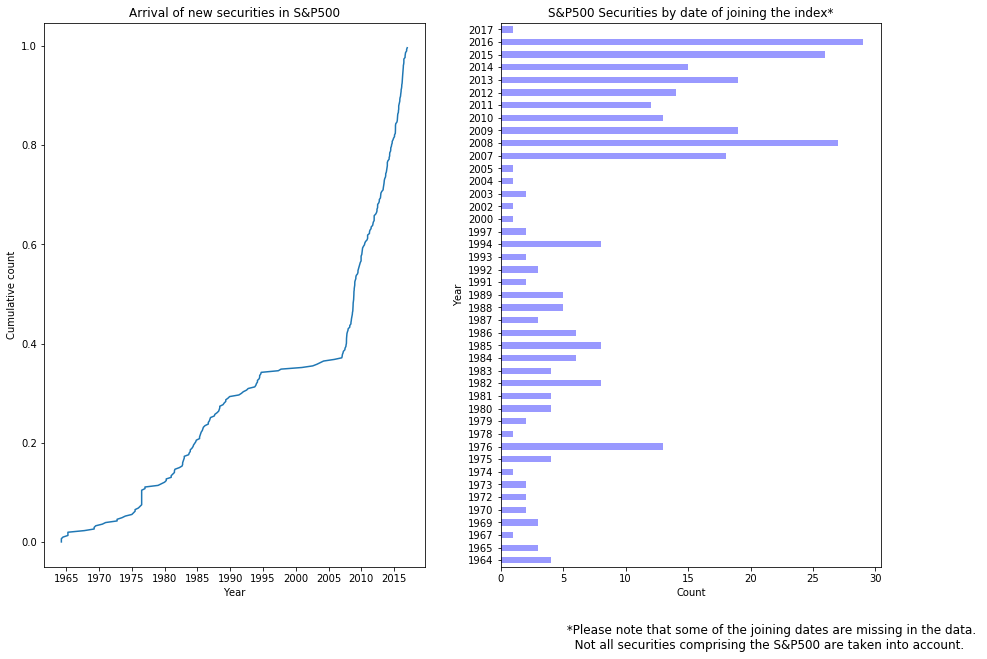

In [25]:
## Plotting the Date of joining the index
fig, ax = plt.subplots(ncols=2, nrows=1, figsize=(15, 10))

#first plot
ax[0].plot(Securities_dates_add_S, np.arange(len(Securities_dates_add_S))/len(Securities_dates_add_S))

ax[0].xaxis.set_major_formatter(DateFormatter('%Y'))
ax[0].xaxis.set_major_locator(YearLocator(5));
ax[0].set_title("Arrival of new securities in S&P500")
ax[0].set_ylabel("Cumulative count")
ax[0].set_xlabel("Year")

#second plot
Securities_dates_add_by_year_S.sort_index(ascending = True).plot(kind='barh', color='b', alpha=0.4, ax=ax[1])

ax[1].set_title("S&P500 Securities by date of joining the index*")
ax[1].set_xlabel("Count")
ax[1].set_ylabel("Year");
ax[1].text(5, -7, ' *Please note that some of the joining dates are missing in the data. \n   Not all securities comprising the S&P500 are taken into account.', fontsize=12);

## Observations and results:

* S&P 500 Index is an American stock market index based on the market capitalizations of 500 large companies having common stock listed on the NYSE or NASDAQ. 
* More than 70 companies out of 500 belong to the Consumer Discretionary Sector
* There are only a few Telecomunication Technology firms listed in the S&P 500 Index.
* 127 firms are registered in New York or California States, which dominate all other states.
* Most of the companies joined the S&P500 index during the years 2007 to 2016.



---
# 4. EDA of prices_split_adjusted_df.csv
----

---
## 4A. S&P 500 Equal Weight Index by stock price
---
**Note:**  
We don't have the continous data on the Market Cap of each firm, so we cannot derive the S&P 500 index.  
However we can replicate the ** S&P 500 Equal Weight Index **, whereas each stock contributes $\frac{1}{500} = 0.002 = 0.02\%$ 


In [26]:
## visualising the DataFrame
prices_split_adjusted_df.tail(2)

symbol       open      close        low   high     volume
date                                                                
2016-12-30    AIV  44.730000  45.450001  44.410000  45.59  1380900.0
2016-12-30    FTV  54.200001  53.630001  53.389999  54.48   705100.0

In [27]:
Equal_weigthed_index_df = pd.DataFrame(prices_split_adjusted_df['close'].groupby('date').mean())
Equal_weigthed_index_df.reset_index(inplace = True)
Equal_weigthed_index_df.head()

date      close
0 2010-01-04  39.266108
1 2010-01-05  39.349167
2 2010-01-06  39.371716
3 2010-01-07  39.490493
4 2010-01-08  39.626119

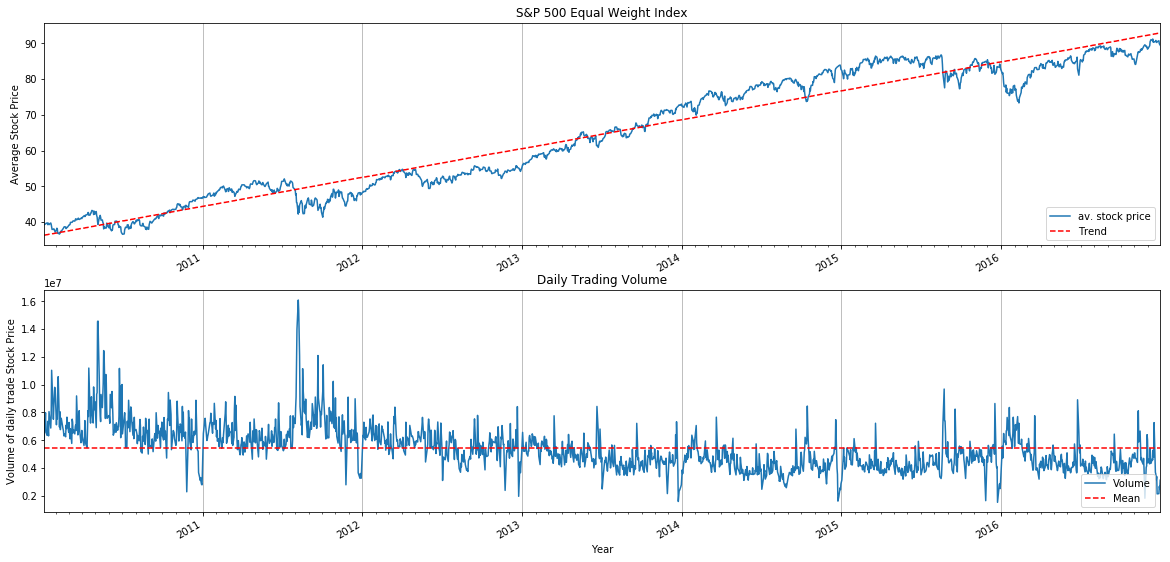

In [28]:
## Plotting the S&P 500 Equally Weigthed index
fig, ax = plt.subplots(ncols = 1, nrows = 2,figsize=(20, 10))

Equal_weigthed_index_df.plot('date', 'close', ax = ax[0], label = "av. stock price")

#calc the trendline (it is simply a linear regression fitting)
x = mdates.date2num(list(Equal_weigthed_index_df['date']))
z = np.polyfit(x, Equal_weigthed_index_df['close'], 1)
p = np.poly1d(z)
xx = np.linspace(x.min(), x.max(), 1762)

ax[0].plot(Equal_weigthed_index_df['date'], p(xx), 'r--', label = "Trend")

ax[0].xaxis.set_major_locator(YearLocator(1));
ax[0].xaxis.set_minor_locator(MonthLocator());

ax[0].legend(loc = "lower right")
ax[0].set_title("S&P 500 Equal Weight Index")
ax[0].set_ylabel("Average Stock Price")
ax[0].set_xlabel("")
ax[0].xaxis.grid(True)


#Second plot
prices_split_adjusted_df['volume'].groupby('date').mean().plot(ax = ax[1], label = "Volume")
ax[1].axhline(np.mean(prices_split_adjusted_df['volume']), linestyle = '--', color = 'r', label = "Mean")
 
ax[1].xaxis.set_major_formatter(DateFormatter('%Y'))
ax[1].xaxis.set_major_locator(YearLocator(1));
ax[1].xaxis.set_minor_locator(MonthLocator());

ax[1].set_title("Daily Trading Volume")
ax[1].set_ylabel("Volume of daily trade Stock Price")
ax[1].set_xlabel("Year")
ax[1].legend(loc = "lower right")
ax[1].xaxis.grid(True)

### Observations and results:

*S&P 500 Equal Weighted Index:*
* Market return aprroximately $\frac{90}{40} = 2.25 $ during the 7-year period - we will investigate that further while calculating the returns
* Quite steady/equal growth during the 7-year period (close to the Trend line)


*Volume:*  
* Peak in mid December - hypothesis trader want to realise gain at the end of the year.
* Trough in volume at the end of the year - could hypothesis that is because of the christmass and New year break.
* Volume of trade more volatile in the year 2010 and 2011.


---
## 4B. Stock Returns
---
### Calculating the Returns:

**Simple Total return ($R_{simple}$) over the 7-year period; and the return over the 7-year period ($r_{7}$)** (2010-01-01 to 2016-12-31):  
### $R_{simple} = 1 + r_{7}= (1+r_{annual})^7 =\frac{P_{t+7y}}{P_t}  => $  $r_{7} = (\frac{P_{t+7y}}{P_t} - 1) $

**Annualised Return:**  
### $r_{annual} = (\sqrt[7]{\frac{P_{t+7y}}{P_t}} - 1)   = \sqrt[7]{1 + r_{7}} -1$

**Daily logarithm returns:**  
### $r_{daily} = log(P_t) - log(P_{t-1d})$, as $P_t = P_{t-1}*e^{r_{daily}}$
---

In [29]:
## Visualize the data we are working on
prices_split_adjusted_df.head(2)

symbol        open       close         low        high     volume
date                                                                        
2016-01-05   WLTW  123.430000  125.839996  122.309998  126.250000  2163600.0
2016-01-06   WLTW  125.239998  119.980003  119.940002  125.540001  2386400.0

In [30]:
prices_df = prices_split_adjusted_df[['symbol','close']].reset_index().sort_values(['symbol', 'date'])
prices_long_df = prices_df.copy() # i will use this dataframe later
prices_df.head(3)

date symbol      close
251  2010-01-04      A  22.389128
718  2010-01-05      A  22.145923
1186 2010-01-06      A  22.067240

In [31]:
#pivoting
prices_df = prices_df.pivot_table(index = 'date', columns = 'symbol', values = 'close')
prices_df.head(2) #problem with NaNs

symbol              A   AAL        AAP       AAPL  ABBV        ABC        ABT  \
date                                                                            
2010-01-04  22.389128  4.77  40.380001  30.572857   NaN  26.629999  26.129884   
2010-01-05  22.145923  5.31  40.139999  30.625713   NaN  26.440001  25.918773   

symbol            ACN       ADBE        ADI ...        XLNX        XOM  \
date                                        ...                          
2010-01-04  42.070000  37.090000  31.670000 ...   25.379999  69.150002   
2010-01-05  42.330002  37.700001  31.620001 ...   25.059999  69.419998   

symbol           XRAY   XRX  XYL   YHOO        YUM        ZBH   ZION  ZTS  
date                                                                       
2010-01-04  35.330002  8.63  NaN  17.10  25.226457  60.020000  13.33  NaN  
2010-01-05  34.910000  8.64  NaN  17.23  25.140187  61.919998  13.80  NaN  

[2 rows x 501 columns]

In [32]:
#Showing the problem!
Total_return_df = prices_df.apply(lambda col: col / col[0])
Total_return_df.tail(2) # problem with NaNs - NaNs appear in the returns of some stocks.

symbol             A      AAL       AAP      AAPL  ABBV       ABC       ABT  \
date                                                                          
2016-12-29  2.038489  9.90566  4.216939  3.818093   NaN  2.979347  1.466137   
2016-12-30  2.034916  9.78826  4.188212  3.788328   NaN  2.936162  1.469964   

symbol           ACN      ADBE       ADI ...       XLNX       XOM      XRAY  \
date                                     ...                                  
2016-12-29  2.781317  2.795363  2.323334 ...   2.393223  1.306580  1.648740   
2016-12-30  2.784169  2.775681  2.293022 ...   2.378645  1.305278  1.634022   

symbol           XRX  XYL      YHOO       YUM       ZBH      ZION  ZTS  
date                                                                    
2016-12-29  1.010429  NaN  2.259649  2.522352  1.724425  3.210053  NaN  
2016-12-30  1.011587  NaN  2.261403  2.510460  1.719427  3.228807  NaN  

[2 rows x 501 columns]

---
** There is a problem with calculating the simple returns in this way.**   
Some of the stocks prices like 'ABBV' aren't noted from the begining i.e 2010-01-04, hence NaN's appear in the final data.  
To overcome this problem we need to search for the first time each stock was noted/introduced to the S&P 500 index. We have created a user-defined function which searches for this date and corresponding value.
The code below overcomes this problem.   

**Note:** I have decided to show step by step solution to this problem, as it was a big-step forward in this project, and not a trivial one.

---

In [33]:
#Some manipulations
prices_df.reset_index(inplace=True)
prices_dates = prices_df['date']
prices_df.drop('date', inplace = True, axis = 1)
prices_df.head(3)

symbol          A   AAL        AAP       AAPL  ABBV        ABC        ABT  \
0       22.389128  4.77  40.380001  30.572857   NaN  26.629999  26.129884   
1       22.145923  5.31  40.139999  30.625713   NaN  26.440001  25.918773   
2       22.067240  5.09  40.490002  30.138571   NaN  26.190001  26.062713   

symbol        ACN       ADBE        ADI ...        XLNX        XOM       XRAY  \
0       42.070000  37.090000  31.670000 ...   25.379999  69.150002  35.330002   
1       42.330002  37.700001  31.620001 ...   25.059999  69.419998  34.910000   
2       42.779999  37.619999  31.559999 ...   24.889999  70.019997  35.139999   

symbol   XRX  XYL   YHOO        YUM        ZBH   ZION  ZTS  
0       8.63  NaN  17.10  25.226457  60.020000  13.33  NaN  
1       8.64  NaN  17.23  25.140187  61.919998  13.80  NaN  
2       8.56  NaN  17.17  24.960462  61.900002  15.00  NaN  

[3 rows x 501 columns]

In [34]:
def func_1(x):
    '''Takes a column(stock name) and returns the value of the first notice/listing in the S&P500 and the index of the notice'''
    return prices_df.loc[prices_df[x].first_valid_index(),x], prices_df[x].first_valid_index()

#example
print(func_1('ABBV'))

(35.119999, 754)


In [35]:
## Calcutating the Return over the 7-year period
# Create empty DataFrame
return_stocks_df = pd.DataFrame()

# go thorugh all the cols and calculate
for col in prices_df.columns:
    return_stocks_df[col] = prices_df[col] / func_1(col)[0] - 1

In [36]:
prices_df.set_index(prices_dates, inplace = True)
return_stocks_df.set_index(prices_dates, inplace = True)
return_stocks_df.tail(2) #all is ok

A      AAL       AAP      AAPL      ABBV       ABC  \
date                                                                    
2016-12-29  1.038489  8.90566  3.216939  2.818093  0.786162  1.979347   
2016-12-30  1.034916  8.78826  3.188212  2.788328  0.783030  1.936162   

                 ABT       ACN      ADBE       ADI    ...         XLNX  \
date                                                  ...                
2016-12-29  0.466137  1.781317  1.795363  1.323334    ...     1.393223   
2016-12-30  0.469964  1.784169  1.775681  1.293022    ...     1.378645   

                 XOM      XRAY       XRX       XYL      YHOO       YUM  \
date                                                                     
2016-12-29  0.306580  0.648740  0.010429  0.809818  1.259649  1.522352   
2016-12-30  0.305278  0.634022  0.011587  0.800727  1.261403  1.510460   

                 ZBH      ZION       ZTS  
date                                      
2016-12-29  0.724425  2.210053  0.729120  
2016-12-30  0.719427  2.228807  0.726217  

[2 rows x 501 columns]

In [37]:
## Calculating the Returns!
# Calculating the returns over the 7 year period
return_7years_df = return_stocks_df["2016-12-30":].transpose().sort_values("2016-12-30", ascending = False) 
return_7years_df.columns = ['Return']

# Calculating the annualized returns
return_stocks_annual_df = ((1 + return_7years_df)**(1/7)) - 1  

##calculating the daily log returns
return_daily_df = prices_df.apply(lambda x: np.log(x) - np.log(x.shift(1))) # shift moves dates back by 1.

---
### Graphs:

* Top & Worst performing stocks in S&P 500 between 01.2010 and 12.2016
* Market (S&P 500 weighted index) performance over these 7 years. - based on returns to check the one drived on prices
* NETLIX stock performance - best stock performance over these 7 years
* Transocean Stock performance - worst stock performance duting these 7 years
--- 

In [38]:
## Selecting best and worst performing stocks
# top and worst 20 -- Simple to percentage
top20_7years_df = return_7years_df[:20] * 100
worst20_7years_df = return_7years_df[-20:] * 100

# top and worst 20 -- Annual to percentage
top20_stocks_annual_df = return_stocks_annual_df[:20] * 100 
worst20_stocks_annual_df = return_stocks_annual_df[-20:] * 100

# top20 and worst daily stocks in daily log returns
top20_stock_daily_change_S = np.mean(return_daily_df).sort_values(ascending = False)[:20] * 100
worst20_stock_daily_change_S = np.mean(return_daily_df).sort_values(ascending = False)[-20:] * 100

In [39]:
## Calculating the Market return and appending to the appropriate data.

#Append the 7 year market return - S&P500 to the data
top20_7years_df.loc['Market'] = return_7years_df['Return'].mean() * 100
worst20_7years_df.loc['Market'] = return_7years_df['Return'].mean() * 100

#Append the Simple Return of the Market- S&P500 to the data
top20_stocks_annual_df.loc['Market'] = return_stocks_annual_df['Return'].mean() * 100
worst20_stocks_annual_df.loc['Market'] = return_stocks_annual_df['Return'].mean() * 100

#Calculate the daily return of the market
market_return_daily_S = pd.Series(return_daily_df.mean().mean() * 100, index = ['Market'])

#Append to the Series
top20_stock_daily_change_S = top20_stock_daily_change_S.append(market_return_daily_S);
worst20_stock_daily_change_S = worst20_stock_daily_change_S.append(market_return_daily_S);

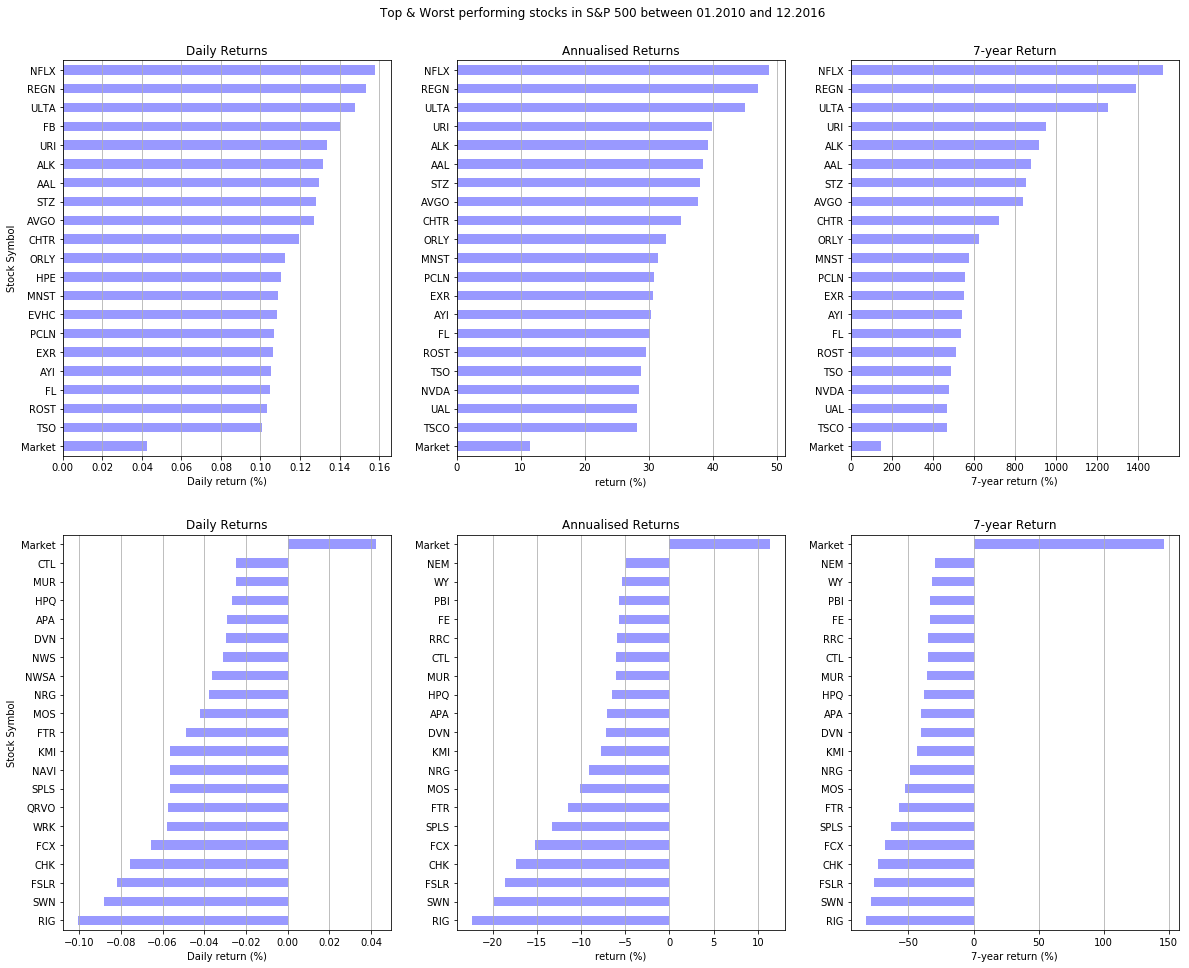

In [40]:
## Plotting the Top & Worst performing stocks in S&P 500 between 01.2010 and 12.2016
fig, ax = plt.subplots(ncols=3, nrows=2, figsize=(20, 15))
fig.suptitle("Top & Worst performing stocks in S&P 500 between 01.2010 and 12.2016")
fig.subplots_adjust(top=0.93)

#first - daily returns
top20_stock_daily_change_S.sort_values(ascending = True).plot(kind='barh', color='b', alpha=0.4, ax=ax[0,0])
#second - Annualized return derived from 7-year return
top20_stocks_annual_df.sort_values(by = 'Return', ascending = True).plot(kind='barh', color='b', alpha=0.4, ax=ax[0,1])
#Third - 7-year return
top20_7years_df.sort_values(by = 'Return', ascending = True).plot(kind='barh', color='b', alpha=0.4, ax=ax[0,2])
#fourth - daily returns
worst20_stock_daily_change_S.sort_values(ascending = True).plot(kind='barh', color='b', alpha=0.4, ax=ax[1,0])
#Fifth - Annualized return derived from 7-year return
worst20_stocks_annual_df.sort_values(by = 'Return', ascending = True).plot(kind='barh', color='b', alpha=0.4, ax=ax[1,1])
#Sixth - 7-year return
worst20_7years_df.sort_values(by = 'Return', ascending = True).plot(kind='barh', color='b', alpha=0.4, ax=ax[1,2])

ax[0,0].set_title("Daily Returns")
ax[0,0].set_xlabel("Daily return (%)")
ax[0,0].set_ylabel("Stock Symbol");
ax[0,0].xaxis.grid(True)

ax[0,2].set_title("7-year Return")
ax[0,2].set_xlabel("7-year return (%)")
ax[0,2].xaxis.grid(True)

ax[0,1].set_title("Annualised Returns")
ax[0,1].set_xlabel("return (%)")
ax[0,1].xaxis.grid(True)

ax[1,0].set_title("Daily Returns")
ax[1,0].set_xlabel("Daily return (%)")
ax[1,0].set_ylabel("Stock Symbol");
ax[1,0].xaxis.grid(True)

ax[1,1].set_title("Annualised Returns")
ax[1,1].set_xlabel("return (%)")
ax[1,1].xaxis.grid(True)

ax[1,2].set_title("7-year Return")
ax[1,2].set_xlabel("7-year return (%)")
ax[1,2].xaxis.grid(True)

ax[0,1].legend_.remove()
ax[1,1].legend_.remove()
ax[0,2].legend_.remove()
ax[1,2].legend_.remove()

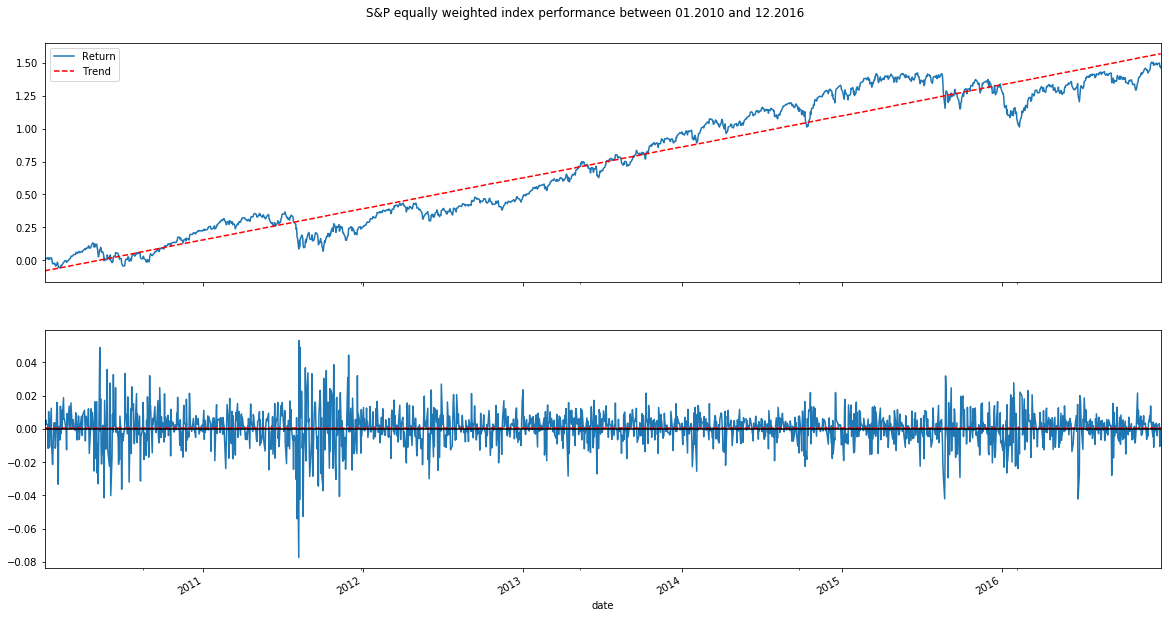

In [41]:
## Market (S&P 500 weighted index) performance over these 7 years
fig, ax = plt.subplots(ncols = 1, nrows = 2,figsize=(20, 10), sharex = True)
fig.suptitle("S&P equally weighted index performance between 01.2010 and 12.2016")
fig.subplots_adjust(top=0.93)

return_stocks_df.mean(axis = 1).plot(ax = ax[0], label = "Return")
return_daily_df.mean(axis = 1).plot( ax = ax[1])

x = mdates.date2num(list(return_stocks_df.index))
z = np.polyfit(x, return_stocks_df.mean(axis = 1), 1)
p = np.poly1d(z)
xx = np.linspace(x.min(), x.max(), 1762)

ax[0].plot(return_stocks_df.index, p(xx), 'r--', label = "Trend")
ax[0].legend(loc = "best")
ax[1].axhline(y = return_daily_df.mean().mean(), color = "red", linestyle = '--',lw = 1.5)
ax[1].axhline(y = 0, color = "black", lw = 1.5)

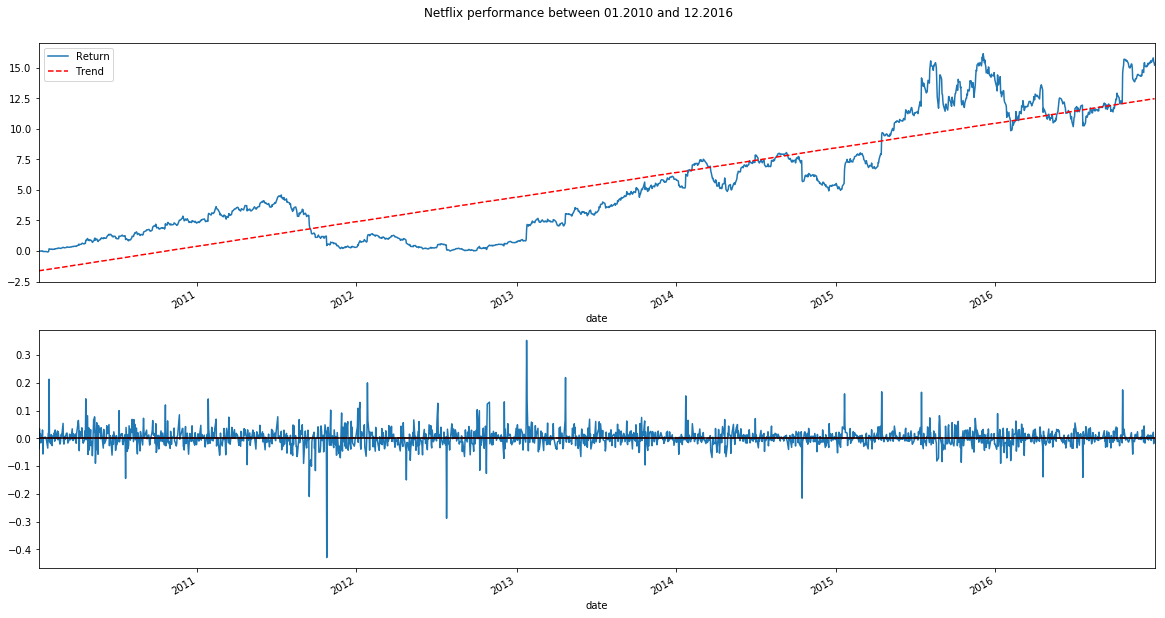

In [42]:
#NETLIX stock performance - best performance over these 7 years
fig, ax = plt.subplots(ncols = 1, nrows = 2,figsize=(20, 10))
fig.suptitle("Netflix performance between 01.2010 and 12.2016")
fig.subplots_adjust(top=0.93)

return_stocks_df['NFLX'].plot(ax = ax[0], label = "Return")
return_daily_df['NFLX'].plot(ax = ax[1])

#Calculate the trend
x = mdates.date2num(list(return_stocks_df.index))
z = np.polyfit(x, return_stocks_df['NFLX'], 1)
p = np.poly1d(z)
xx = np.linspace(x.min(), x.max(), 1762)

ax[0].plot(return_stocks_df.index, p(xx), 'r--', label = "Trend")
ax[0].legend(loc = "best")
ax[1].axhline(y = return_daily_df['NFLX'].mean(), color = "red", linestyle = '--',lw = 1.5)
ax[1].axhline(y = 0, color = "black", lw = 1.5);

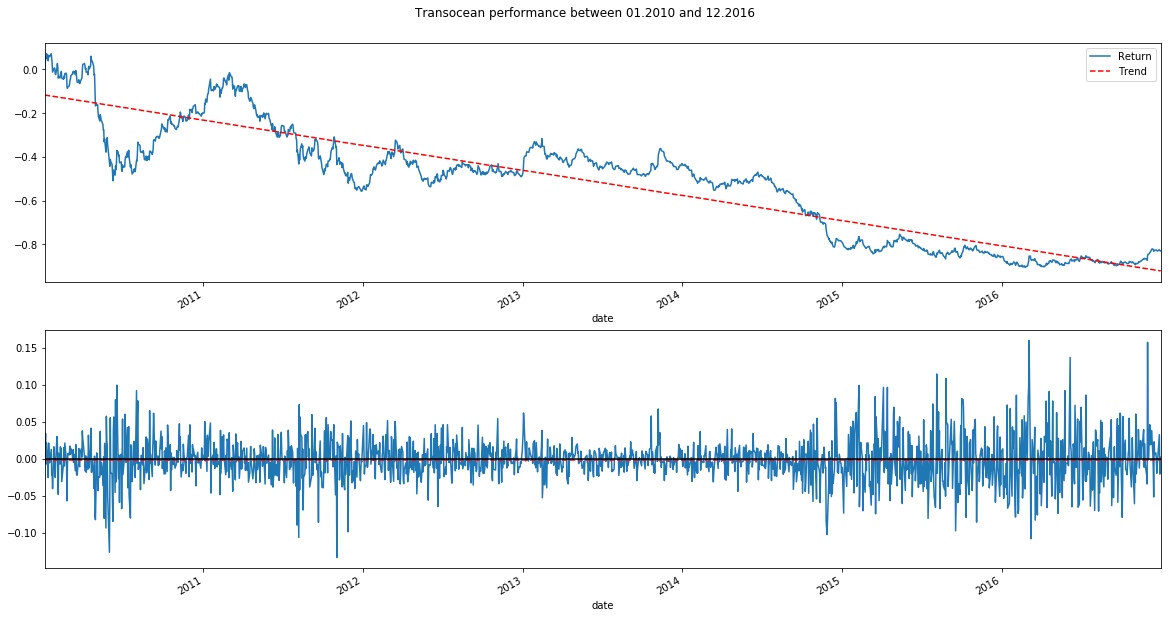

In [43]:
## Transocean Stock performance - worst stock performance duting these 7 years
fig, ax = plt.subplots(ncols = 1, nrows = 2,figsize=(20, 10))
fig.suptitle("Transocean performance between 01.2010 and 12.2016")
fig.subplots_adjust(top=0.93)

return_stocks_df['RIG'].plot(ax = ax[0], label = "Return")
return_daily_df['RIG'].plot(ax = ax[1])

#Calculate the trend
x = mdates.date2num(list(return_stocks_df.index))
z = np.polyfit(x, return_stocks_df['RIG'], 1)
p = np.poly1d(z)
xx = np.linspace(x.min(), x.max(), 1762)

ax[0].plot(return_stocks_df.index, p(xx), 'r--', label = "Trend")
ax[0].legend(loc = "best")
ax[1].axhline(y = return_daily_df['RIG'].mean(), color = "red", linestyle = '--',lw = 1.5)
ax[1].axhline(y = 0, color = "black", lw = 1.5);

### Observations and results:  


* Facebook stock (FB) wasn't included in the S&P500 throughout all 7 years (2010 - 2016), but the stock has a very large daily return - the third largest. Indeed Facebook(FB) join S&P 500 index in DEC 2013.
* If one invested \$100 in Netflix stock in 2010 it value was worth \$1600 at the end of 2016.
* However if on invested \$100 in Transocean stock in 2010 he would lose \$70 to the end of 2016.
* Transocean's stock has higher trading volume(2015-2016) while he stock price is in the trough - it seems like investor are very unconfident in what direction the stock would go and change the position often.


---
## 4C. Stocks Correlations

---

In [44]:
# Ploting the correlation matrix in monotonic order of the Fiedler vector elements
corr = return_daily_df.corr()
A = corr.as_matrix()

# compute the Laplacian matrix
L = np.diag(sum(A,1)) - A

# compute eigenvalues and eigenvectors of the Laplacian matrix
D, V =np.linalg.eigh(L)
argD = np.argsort(D)
D=D[argD]
V=V[:,argD]

# get the Fiedler eigenvector
fiedler=V[:,1]

# permutation in the order of Fiedler vector elements
Fperm=np.argsort(-fiedler)

# reorder the rows
Aperm = A[Fperm,:]
# reorder the columns
Aperm = Aperm[:,Fperm]

## Correlation Matrix Dataframe after reordering from the Fielder eigenvector 
DF = pd.DataFrame(Aperm, columns = corr.columns[Fperm], index = corr.index[Fperm])

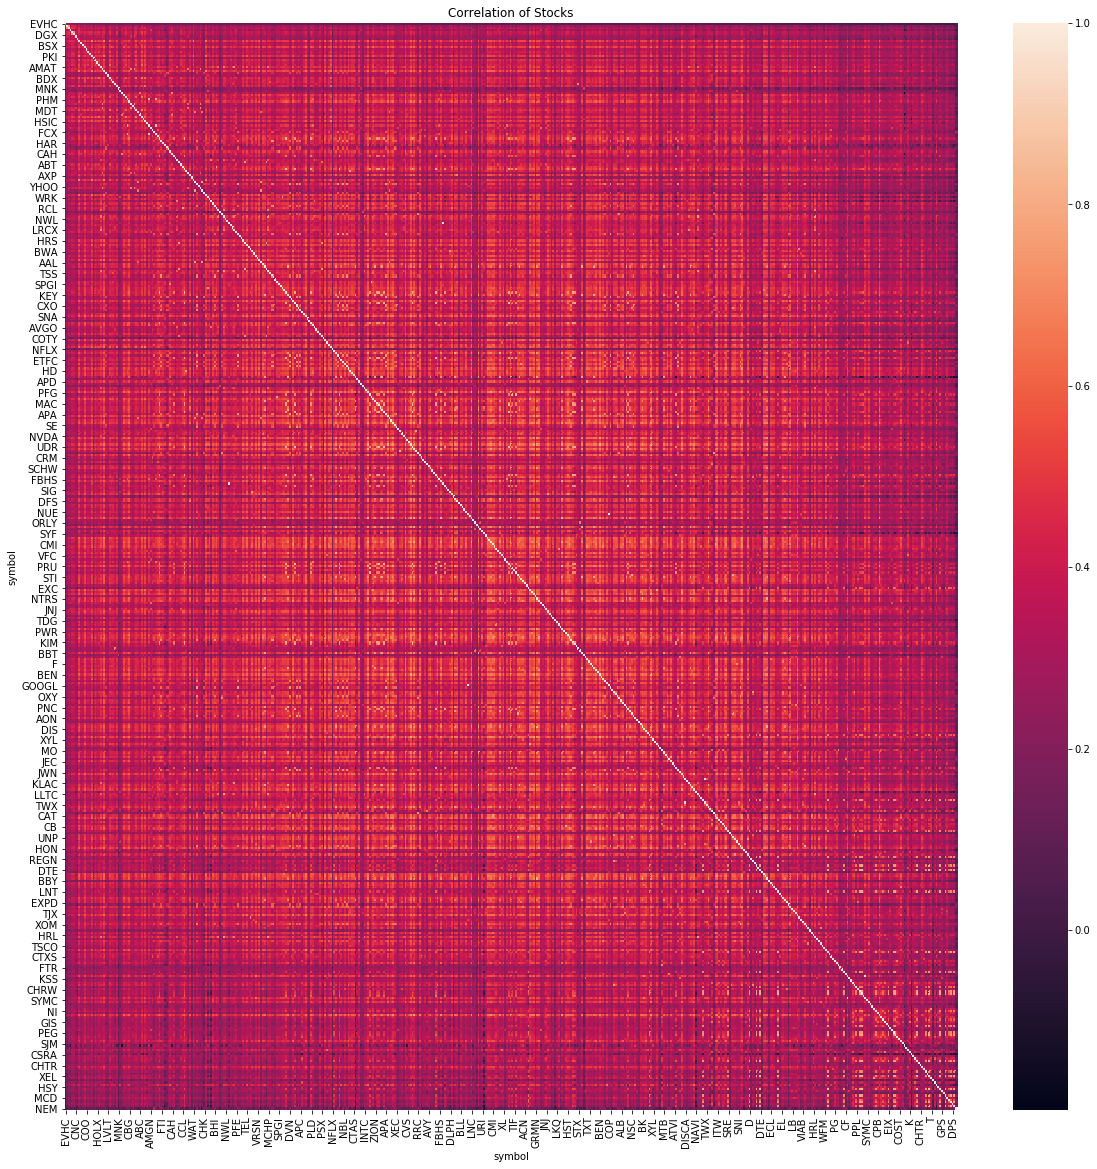

In [45]:
## Ploting the Correlation Matrix
fig, ax = plt.subplots(figsize=(20, 20))
ax = sns.heatmap(DF)
ax.set_title("Correlation of Stocks");

In [46]:
DF.index.name = 'symbol_2'

In [47]:
##Search for largest and lowest correlations
s_df = pd.DataFrame(DF.unstack().sort_values(ascending = False))
s_df.drop_duplicates(inplace = True)
s_df.reset_index(inplace = True)
s_df.rename(columns = {0:'Correlation'}, inplace = True)

## looking only at lowest and largest correlations
s_df = s_df[1:10].append(s_df[-10:])

## merging table to get the name of the stock in addition to the Ticker Symbol
s_df = pd.merge(s_df, securities_df[['Ticker symbol', 'Security']], left_on = 'symbol', right_on = 'Ticker symbol')
s_df = pd.merge(s_df[['symbol','symbol_2', 'Correlation', 'Security']], securities_df[['Ticker symbol', 'Security']], left_on = 'symbol_2', right_on = 'Ticker symbol')
s_df.drop('Ticker symbol', inplace = True, axis =1)

In [48]:
print('--------------------------------------------')
print('Top and lowest correlations between stocks:')
print(s_df)

--------------------------------------------
Top and lowest correlations between stocks:
   symbol symbol_2  Correlation                        Security_x  \
0    GOOG    GOOGL     0.995723              Alphabet Inc Class C   
1     FOX     FOXA     0.973625  Twenty-First Century Fox Class B   
2     NWS     NWSA     0.962894                News Corp. Class B   
3   DISCK    DISCA     0.951513        Discovery Communications-C   
4     MET      PRU     0.876349                      MetLife Inc.   
5     VNO      BXP     0.873885              Vornado Realty Trust   
6     EQR      AVB     0.872015                Equity Residential   
7     WEC      XEL     0.868041              Wec Energy Group Inc   
8     ESS      UDR     0.858230        Essex Property Trust, Inc.   
9     CFG      PNW    -0.088287          Citizens Financial Group   
10    CFG       ED    -0.144257          Citizens Financial Group   
11   CSRA       ED    -0.151448                         CSRA Inc.   
12    FTV     

### Observations and results:

**Observations of stocks with high positive correlation**
* The first 5 correlations are just correlation between two stock that have just different Share Class(preference) - voting rights
* Metlife(MET) and Prudential(PRU). Both companies are insurer specialising in life-insurance
* Vornado Realty Trust (VNO) and Boston Properties(BXP). Both real estate investment trust.
* Equity Residential (EQR) and AvalonBay Communities(AVB). Both real estate investment trust.
* WEC Energy Group(WEC) and Xcel Energy(XEL). Borh electric service companies.
* Essex Property Trust(ESS) and United Dominion Realty Trust(UDR). Both real estate investment trust.

It seems that real estate investment trust companies' stock price have a strong positive correlation. Out of 505 stock, hence $\frac{505 * 504}{2} $correlation, 3 top out of 5 top corelation are derived from real estate funds.  

Lets investigate it further and look at returns & correlations for the companies Sectors.

---
## 4D. Sectors Returns

---

---
### Graphs:
* Sectors performances between 01.2010 and 12.2016.
* Daily, annualised and total 7-year returns for each Sector


In [49]:
prices_df = prices_split_adjusted_df[['symbol','close']].reset_index().sort_values(['symbol', 'date']).reset_index(drop = True)

In [50]:
## merging above tables
merged_prices_df = pd.merge(prices_df, securities_df[['Ticker symbol','Security','GICS Sector']], left_on = 'symbol', right_on = 'Ticker symbol')

In [51]:
prices_sector_df = merged_prices_df.groupby(['date', 'GICS Sector'])['close'].mean().reset_index('GICS Sector')
prices_sector_wide_df = prices_sector_df.pivot_table(index = 'date', columns = 'GICS Sector', values = 'close')
Sector_total_return_df = prices_sector_wide_df.apply(lambda col: col / col[0])
Sector_total_return_df.tail(2)

GICS Sector  Consumer Discretionary  Consumer Staples    Energy  Financials  \
date                                                                          
2016-12-29                 3.155780          2.177576  1.305694    1.983757   
2016-12-30                 3.129355          2.164769  1.299284    1.988032   

GICS Sector  Health Care  Industrials  Information Technology  Materials  \
date                                                                       
2016-12-29      2.638139     2.371561                2.304054   1.942159   
2016-12-30      2.626690     2.361870                2.281108   1.925959   

GICS Sector  Real Estate  Telecommunications Services  Utilities  
date                                                              
2016-12-29      2.192166                     1.404880   1.655281  
2016-12-30      2.214718                     1.395624   1.647799

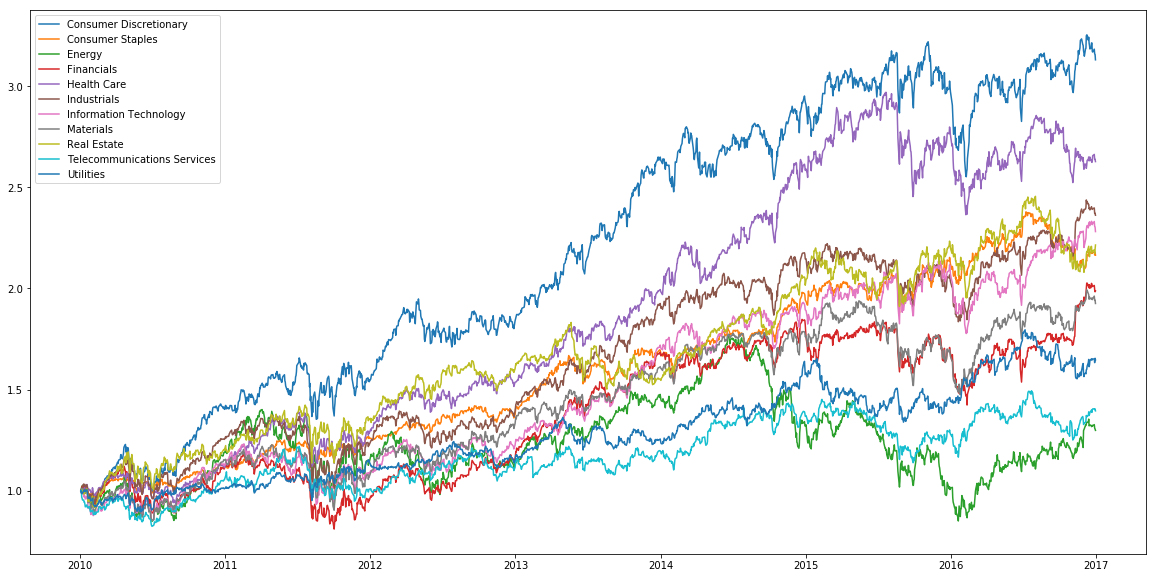

In [52]:
# Sectors performances between 01.2010 and 12.2016
fig, ax = plt.subplots(figsize=(20, 10))

ax.plot(Sector_total_return_df, label = Sector_total_return_df.columns)
ax.legend(Sector_total_return_df.columns);

In [53]:
## Calculating the Returns
# Calculating the returns over the 7 year period
sector_return_7years_df = Sector_total_return_df["2016-12-30":].transpose().sort_values("2016-12-30", ascending = False) 
sector_return_7years_df.columns = ['Return']

# Calculating the annualized returns
sector_return_annual_df = ((1 + sector_return_7years_df)**(1/7)) - 1  

# Calculating the daily log returns
sector_return_daily_df = prices_sector_wide_df.apply(lambda x: np.log(x) - np.log(x.shift(1))) # shift moves dates back by 1.

# All to percentage
sector_return_7years_df = sector_return_7years_df * 100
sector_return_annual_df = sector_return_annual_df * 100
sector_return_daily_df = sector_return_daily_df * 100

# average daily returns over the 7-year period
sector_return_daily_S = sector_return_daily_df.mean()

In [54]:
## Calculating the Market return and appending to the appropriate data.

#Append the 7 year market return - S&P500 to the data
sector_return_7years_df.loc['Market'] = sector_return_7years_df['Return'].mean()

#Append the Annualize Return of the Market- S&P500 to the data
sector_return_annual_df.loc['Market'] = sector_return_annual_df['Return'].mean()

#calculate the daily return of the market
market_return_daily_S = pd.Series(sector_return_daily_df.mean().mean() , index = ['Market'])

#append to the Series
sector_return_daily_S = sector_return_daily_S.append(market_return_daily_S);

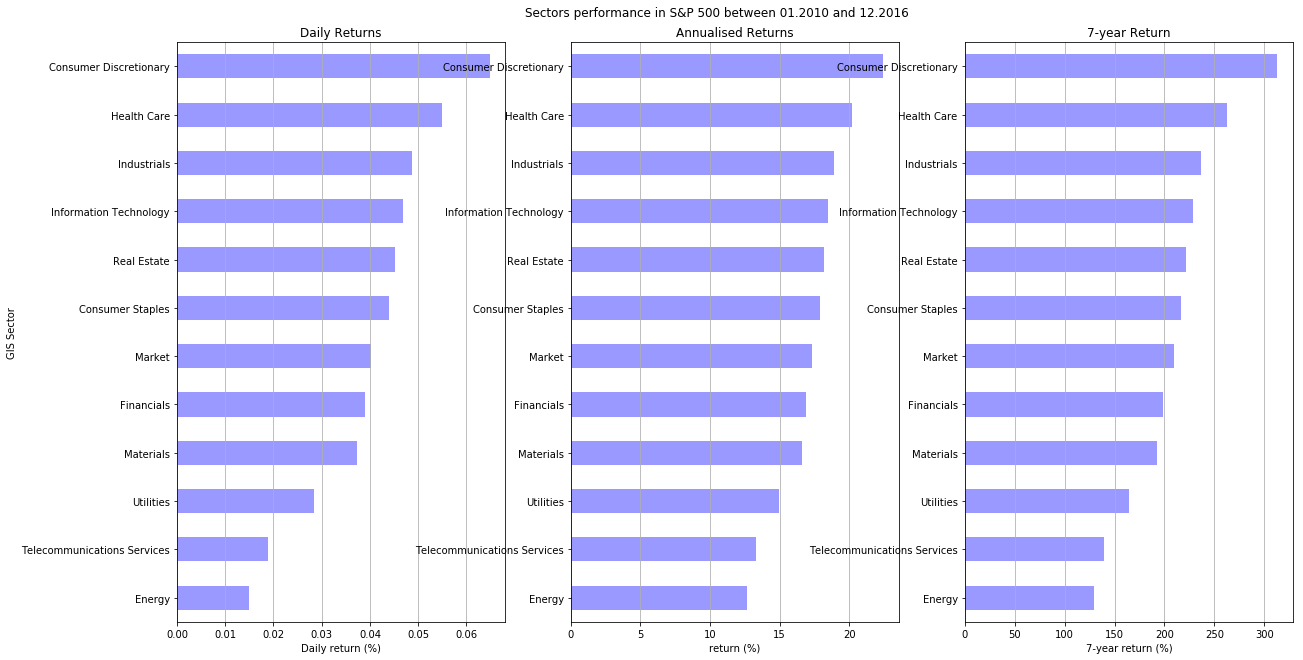

In [55]:
## Daily and annualised returns for each Sector
fig, ax = plt.subplots(ncols=3, nrows=1, figsize=(20, 10))
fig.suptitle("Sectors performance in S&P 500 between 01.2010 and 12.2016")
fig.subplots_adjust(top=0.93)

#first - daily returns
sector_return_daily_S.sort_values(ascending = True).plot(kind='barh', color='b', alpha=0.4, ax=ax[0])

#second - Annualized return derived from 7-year return
sector_return_annual_df.sort_values(by = 'Return', ascending = True).plot(kind='barh', color='b', alpha=0.4, ax=ax[1])

#Third - 7-year return
sector_return_7years_df.sort_values(by = 'Return', ascending = True).plot(kind='barh', color='b', alpha=0.4, ax=ax[2])

ax[0].set_title("Daily Returns")
ax[0].set_xlabel("Daily return (%)")
ax[0].set_ylabel("GIS Sector");
ax[0].xaxis.grid(True)

ax[1].set_title("Annualised Returns")
ax[1].set_xlabel("return (%)")
ax[1].set_ylabel("")
ax[1].xaxis.grid(True)

ax[2].set_title("7-year Return")
ax[2].set_xlabel("7-year return (%)")
ax[2].set_ylabel("")
ax[2].xaxis.grid(True)

ax[1].legend_.remove()
ax[2].legend_.remove()

### Observations and results:

* All Sectors had a positive return during the 7-year period
* Consumer Discretionary and Health Care Sectors performed the best during the 7-year period.
* The Energy, Telecommunication Servicees, Utilies, Material and Financials Sector underperformed - they performed worse then the market.
* The Energy Sector had the smallest return over the period - maybe due to the fact of gas and oil prices, which are the main energy resources in the US



---

## 4E. Sector Correlations
---



### Graphs:
* Sectors correlation heatmap in in monotonic order of the Fiedler vector elements 

In [56]:
Sector_corr_df = sector_return_daily_df.corr()
Sector_corr_df.index.name = 'GICS Sector_2'
Sector_corr_df

GICS Sector                  Consumer Discretionary  Consumer Staples  \
GICS Sector_2                                                           
Consumer Discretionary                     1.000000          0.730767   
Consumer Staples                           0.730767          1.000000   
Energy                                     0.678099          0.566756   
Financials                                 0.816623          0.716062   
Health Care                                0.802618          0.715023   
Industrials                                0.871389          0.757301   
Information Technology                     0.871306          0.717723   
Materials                                  0.819379          0.716105   
Real Estate                                0.724578          0.706569   
Telecommunications Services                0.622095          0.643421   
Utilities                                  0.498096          0.694376   

GICS Sector                    Energy  Financials  Health Care  Industrials  \
GICS Sector_2                                                                 
Consumer Discretionary       0.678099    0.816623     0.802618     0.871389   
Consumer Staples             0.566756    0.716062     0.715023     0.757301   
Energy                       1.000000    0.732811     0.634848     0.763383   
Financials                   0.732811    1.000000     0.782338     0.896861   
Health Care                  0.634848    0.782338     1.000000     0.807689   
Industrials                  0.763383    0.896861     0.807689     1.000000   
Information Technology       0.692819    0.825659     0.805736     0.865189   
Materials                    0.796871    0.849060     0.772277     0.901716   
Real Estate                  0.574242    0.722841     0.673776     0.743989   
Telecommunications Services  0.546383    0.655732     0.599537     0.668680   
Utilities                    0.456025    0.509008     0.501577     0.564626   

GICS Sector                  Information Technology  Materials  Real Estate  \
GICS Sector_2                                                                 
Consumer Discretionary                     0.871306   0.819379     0.724578   
Consumer Staples                           0.717723   0.716105     0.706569   
Energy                                     0.692819   0.796871     0.574242   
Financials                                 0.825659   0.849060     0.722841   
Health Care                                0.805736   0.772277     0.673776   
Industrials                                0.865189   0.901716     0.743989   
Information Technology                     1.000000   0.817643     0.687916   
Materials                                  0.817643   1.000000     0.700951   
Real Estate                                0.687916   0.700951     1.000000   
Telecommunications Services                0.641662   0.644034     0.594661   
Utilities                                  0.491665   0.523398     0.674761   

GICS Sector                  Telecommunications Services  Utilities  
GICS Sector_2                                                        
Consumer Discretionary                          0.622095   0.498096  
Consumer Staples                                0.643421   0.694376  
Energy                                          0.546383   0.456025  
Financials                                      0.655732   0.509008  
Health Care                                     0.599537   0.501577  
Industrials                                     0.668680   0.564626  
Information Technology                          0.641662   0.491665  
Materials                                       0.644034   0.523398  
Real Estate                                     0.594661   0.674761  
Telecommunications Services                     1.000000   0.536014  
Utilities                                       0.536014   1.000000

In [57]:
# Order in monotonic order of the Fiedler vector elements
A = Sector_corr_df.as_matrix()

# compute the Laplacian matrix
L = np.diag(sum(A,1)) - A

# compute eigenvalues and eigenvectors of the Laplacian matrix
D, V = np.linalg.eigh(L)
argD = np.argsort(D)
D=D[argD]
V=V[:,argD]

# get the Fiedler eigenvector
fiedler=V[:,1]

# permutation in the order of Fiedler vector elements
Fperm=np.argsort(-fiedler)

# reorder the rows
Aperm = A[Fperm,:]
# reorder the columns
Aperm = Aperm[:,Fperm]

## Correlation Matrix Dataframe after reordering from the Fielder eigenvector 
DF_2 = pd.DataFrame(Aperm, columns = Sector_corr_df.columns[Fperm], index = Sector_corr_df.index[Fperm])

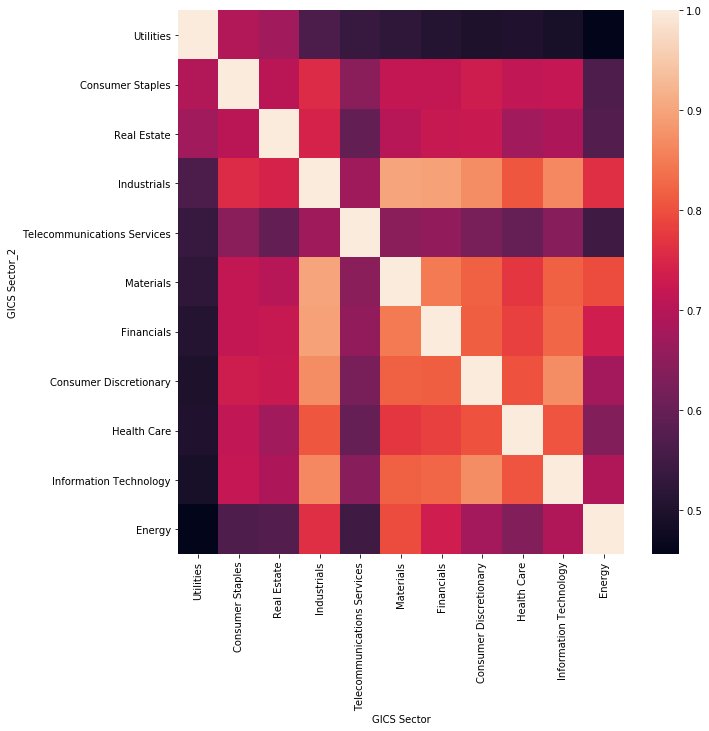

In [58]:
## Ploting the Correlation Matrix
fig, ax = plt.subplots(figsize=(10, 10))
ax = sns.heatmap(DF_2)

In [59]:
## Highest and Lowest Correlations between Sectors!!!
so = pd.DataFrame(Sector_corr_df.unstack().sort_values(ascending = False))
so.drop_duplicates(inplace = True)
so.reset_index(inplace = True)

print("------------------------------------")
print("Highest correlations between sectors: \n")
print(so[1:5])

print("\n------------------------------------")
print("Lowest correlations between sectors: \n")

print(so[-4:])

------------------------------------
Highest correlations between sectors: 

              GICS Sector           GICS Sector_2         0
1               Materials             Industrials  0.901716
2              Financials             Industrials  0.896861
3  Consumer Discretionary             Industrials  0.871389
4  Consumer Discretionary  Information Technology  0.871306

------------------------------------
Lowest correlations between sectors: 

               GICS Sector GICS Sector_2         0
52               Utilities   Health Care  0.501577
53  Consumer Discretionary     Utilities  0.498096
54  Information Technology     Utilities  0.491665
55               Utilities        Energy  0.456025


### Observation and results:

**Correlation - Observations and results:**

* All sectors are positively correlated (corr >= 0)
* From the Fiedlers reoriented Heatmap we can see that Telecomunication Service generally the lowest correlation with other sectors
* As Industrial have strong positive correlation with other sectors, one can hypothetise that if the Industrial Sector is doing well, the market is generally doing also well.

---

# 5. Explanatory Data Analysis of Fundamentals.csv
---

## Data Analysis:
---

In [60]:
print("Number of firms fundamental data for year 2012:", len(fundamentals_df[fundamentals_df['For Year'] == 2012]))
print("Number of firms fundamental data for year 2013:", len(fundamentals_df[fundamentals_df['For Year'] == 2013]))
print("Number of firms fundamental data for year 2014:", len(fundamentals_df[fundamentals_df['For Year'] == 2014]))
print("Number of firms fundamental data for year 2015:", len(fundamentals_df[fundamentals_df['For Year'] == 2015]))
print("Number of firms fundamental data for year 2016:", len(fundamentals_df[fundamentals_df['For Year'] == 2016]))

Number of firms fundamental data for year 2012: 244
Number of firms fundamental data for year 2013: 425
Number of firms fundamental data for year 2014: 428
Number of firms fundamental data for year 2015: 425
Number of firms fundamental data for year 2016: 85


In [61]:
## we will use only for 2013,2014,2015 - other wise it would be unrepresentative
fund_2012 = fundamentals_df[fundamentals_df['For Year'] == 2012].mean()
fund_2013 = fundamentals_df[fundamentals_df['For Year'] == 2013].mean()
fund_2014 = fundamentals_df[fundamentals_df['For Year'] == 2014].mean()
fund_2015 = fundamentals_df[fundamentals_df['For Year'] == 2015].mean()

#Concat and Transpose
fund_yearly_df = pd.concat([fund_2013, fund_2014, fund_2015], axis=1)
fund_yearly_df.columns = [2013, 2014, 2015]
fund_yearly_df = fund_yearly_df.T

## Graphs:
* Revenues and Statement of Financial Position
* Key Ratios

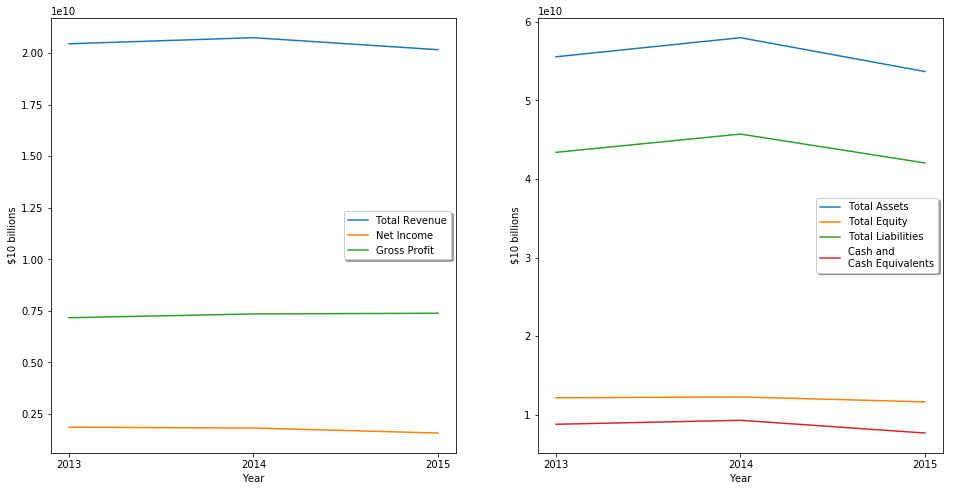

In [62]:
fig, axes = plt.subplots(figsize=(16, 8), nrows = 1, ncols = 2)

axes[0].plot(fund_yearly_df.index, fund_yearly_df['Total Revenue'], label = 'Total Revenue')
axes[0].plot(fund_yearly_df.index, fund_yearly_df['Net Income'], label = 'Net Income')
axes[0].plot(fund_yearly_df.index, fund_yearly_df['Gross Profit'], label = 'Gross Profit')

axes[1].plot(fund_yearly_df.index, fund_yearly_df['Total Assets'], label = 'Total Assets')
axes[1].plot(fund_yearly_df.index, fund_yearly_df['Total Equity'], label = 'Total Equity')
axes[1].plot(fund_yearly_df.index, fund_yearly_df['Total Liabilities'], label = 'Total Liabilities')
axes[1].plot(fund_yearly_df.index, fund_yearly_df['Cash and Cash Equivalents'], label = 'Cash and \nCash Equivalents')

axes[0].set_ylabel("$10 billions")
axes[0].set_xlabel("Year")
axes[0].set_xticks([2013, 2014, 2015])
axes[0].legend(loc='best', shadow=True);
axes[1].set_xticks([2013, 2014, 2015])
axes[1].set_ylabel("$10 billions")#
axes[1].set_xlabel("Year")
axes[1].legend(loc='best', shadow=True);

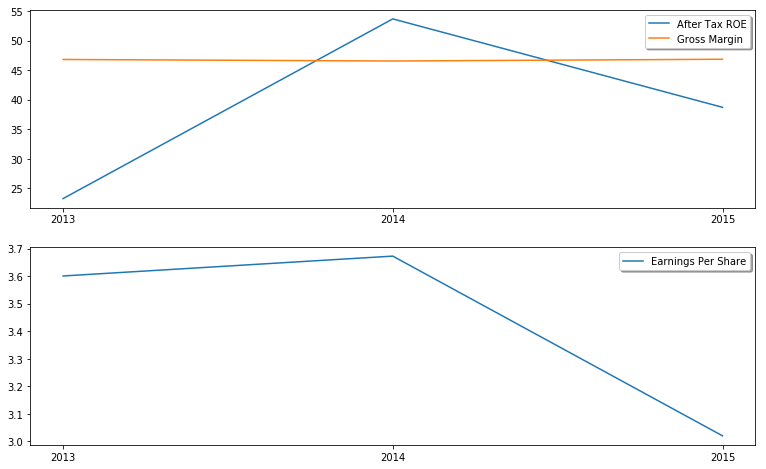

In [63]:
fig, axes = plt.subplots(figsize=(13, 8),  nrows = 2, ncols = 1)

axes[0].plot(fund_yearly_df.index, fund_yearly_df['After Tax ROE'], label = 'After Tax ROE')
axes[0].plot(fund_yearly_df.index, fund_yearly_df['Gross Margin'], label = 'Gross Margin')
axes[1].plot(fund_yearly_df.index, fund_yearly_df['Earnings Per Share'], label = 'Earnings Per Share')

axes[0].set_xticks([2013, 2014, 2015])
axes[0].legend(loc='best', shadow=True)
axes[1].set_xticks([2013, 2014, 2015])
axes[1].legend(loc='best', shadow=True);

## Observations and results:

* We only have yearly statements and not of all the firms so it is hard to reach any substantial conclusions.
* It looks like most of the Key Indicators remain stable across the whole S&P 500 index.
* If we had more substantial data for all the companies, throughout all the years (2010-2016) we could research it more.

---
# 7. Machine Learning - Stock Price Prediction

### Long Short Term Memory Neural Networks
---

** Note**:  
In this section I researched a few stock prediction models. However, after quite a while I found out it is a very difficult task to do it correctly, and making predictions based on past stock prices is almost impossible. Under the financial theory stock prices follow a random walk with a drift and hence are not predictable. To understand more about the certain techniques I have included and reframed [BenjiKCF code](https://github.com/BenjiKCF/Neural-Network-with-Financial-Time-Series-Data), [link_2](https://www.kaggle.com/benjibb/lstm-stock-prediction-20170507) below.  

Given our data, performing Technical Analysis for stock predictions is quite impossible. That is because we have only fundamental data for 3 years - 2013, 2014, 2015.

## Readings
* [Long Short Term Memory Networks](http://colah.github.io/posts/2015-08-Understanding-LSTMs/)
* [Paper](https://www.ijcai.org/Proceedings/15/Papers/329.pdf)

In [64]:
from pandas import datetime
import math, time
import itertools
from sklearn import preprocessing
import datetime
from operator import itemgetter
from sklearn.metrics import mean_squared_error
from math import sqrt
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation
from keras.layers.recurrent import LSTM
from keras.models import load_model
import keras
import h5py
import requests
import os

Using TensorFlow backend.


In [65]:
prices_split_adjusted_df.head()

symbol        open       close         low        high     volume
date                                                                        
2016-01-05   WLTW  123.430000  125.839996  122.309998  126.250000  2163600.0
2016-01-06   WLTW  125.239998  119.980003  119.940002  125.540001  2386400.0
2016-01-07   WLTW  116.379997  114.949997  114.930000  119.739998  2489500.0
2016-01-08   WLTW  115.480003  116.620003  113.500000  117.440002  2006300.0
2016-01-11   WLTW  117.010002  114.970001  114.089996  117.330002  1408600.0

In [66]:
prices_split_adjusted_df["adj close"] = prices_split_adjusted_df.close # Moving close to the last column
prices_split_adjusted_df.drop(['close'], 1, inplace=True) # Moving close to the last column
prices_split_adjusted_df.head()

symbol        open         low        high     volume   adj close
date                                                                        
2016-01-05   WLTW  123.430000  122.309998  126.250000  2163600.0  125.839996
2016-01-06   WLTW  125.239998  119.940002  125.540001  2386400.0  119.980003
2016-01-07   WLTW  116.379997  114.930000  119.739998  2489500.0  114.949997
2016-01-08   WLTW  115.480003  113.500000  117.440002  2006300.0  116.620003
2016-01-11   WLTW  117.010002  114.089996  117.330002  1408600.0  114.970001

In [67]:
NFLX_df = prices_split_adjusted_df[prices_split_adjusted_df.symbol == 'NFLX']
NFLX_df.drop(['symbol'],1,inplace=True)
NFLX_df.head()

open       low      high      volume  adj close
date                                                           
2010-01-04  7.931428  7.565714  7.961429  17239600.0   7.640000
2010-01-05  7.652857  7.258572  7.657143  23753100.0   7.358572
2010-01-06  7.361429  7.197143  7.672857  23290400.0   7.617143
2010-01-07  7.731429  7.462857  7.757143   9955400.0   7.485714
2010-01-08  7.498571  7.465714  7.742857   8180900.0   7.614286

In [68]:
def normalize_data(df):
    '''This estimator scales and translates each feature individually
    such that it is in the given range on the training set, i.e. between zero and one.'''
    min_max_scaler = preprocessing.MinMaxScaler()
    df['open'] = min_max_scaler.fit_transform(df.open.values.reshape(-1,1))
    df['high'] = min_max_scaler.fit_transform(df.high.values.reshape(-1,1))
    df['low'] = min_max_scaler.fit_transform(df.low.values.reshape(-1,1))
    df['volume'] = min_max_scaler.fit_transform(df.volume.values.reshape(-1,1))
    df['adj close'] = min_max_scaler.fit_transform(df['adj close'].values.reshape(-1,1))
    return df

In [69]:
NFLX_df = normalize_data(NFLX_df)
NFLX_df.head()

open       low      high    volume  adj close
date                                                         
2010-01-04  0.007820  0.005310  0.006209  0.049768   0.005015
2010-01-05  0.005577  0.002739  0.003795  0.070516   0.002744
2010-01-06  0.003231  0.002224  0.003920  0.069042   0.004831
2010-01-07  0.006210  0.004449  0.004589  0.026564   0.003770
2010-01-08  0.004335  0.004473  0.004475  0.020911   0.004808

In [70]:
def load_data(stock, seq_len):
    '''Load and reframing the data - how many past day price to include'''
    amount_of_features = len(stock.columns) # 5
    data = stock.as_matrix() 
    sequence_length = seq_len + 1 # index starting from 0
    result = []
    
    for index in range(len(data) - sequence_length): # maxmimum date = lastest date - sequence length
        result.append(data[index: index + sequence_length]) # index : index + 22days
    
    result = np.array(result)
    row = round(0.9 * result.shape[0]) # 90% split
    train = result[:int(row), :] # 90% date, all features 
    
    x_train = train[:, :-1] # don't include the last day
    y_train = train[:, -1][:,-1] # don't include the last day
    
    x_test = result[int(row):, :-1] 
    y_test = result[int(row):, -1][:,-1]

    x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], amount_of_features))
    x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], amount_of_features))  

    return [x_train, y_train, x_test, y_test]

In [71]:
def build_model(layers):
    '''Building the LSTM Model'''
    d = 0.3
    model = Sequential()
    
    model.add(LSTM(256, input_shape=(layers[1], layers[0]), return_sequences=True))
    model.add(Dropout(d))
        
    model.add(LSTM(256, input_shape=(layers[1], layers[0]), return_sequences=False))
    model.add(Dropout(d))
        
    model.add(Dense(32,kernel_initializer="uniform",activation='relu'))        
    model.add(Dense(1,kernel_initializer="uniform",activation='linear'))
    
    # adam = keras.optimizers.Adam(decay=0.2)
        
    start = time.time()
    model.compile(loss='mse',optimizer='adam', metrics=['accuracy'])
    print("Compilation Time : ", time.time() - start)
    return model

In [72]:
window = 22 # number of past day prices to include in the model
X_train, y_train, X_test, y_test = load_data(NFLX_df, window)
print (X_train[0], y_train[0])

[[  7.81959601e-03   5.30967345e-03   6.20864772e-03   4.97675404e-02
    5.01510208e-03]
 [  5.57721383e-03   2.73854895e-03   3.79543063e-03   7.05160938e-02
    2.74389672e-03]
 [  3.23133468e-03   2.22432525e-03   3.92006014e-03   6.90421772e-02
    4.83063852e-03]
 [  6.20968010e-03   4.44864571e-03   4.58850932e-03   2.65639459e-02
    3.76997531e-03]
 [  4.33527666e-03   4.47256314e-03   4.47521058e-03   2.09113309e-02
    4.80758403e-03]
 [  5.63470857e-03   4.99874676e-03   4.16931011e-03   1.64605934e-02
    4.72687891e-03]
 [  4.57676537e-03   4.35297357e-03   3.20629125e-03   1.50156645e-02
    3.73538724e-03]
 [  5.25523042e-03   5.24987746e-03   4.56585003e-03   4.07924810e-02
    5.56849394e-03]
 [  4.49626837e-03   2.83421750e-03   3.14964188e-03   5.11879411e-02
    2.14438782e-03]
 [  2.29988037e-03   2.52329201e-03   1.81274239e-03   3.63618120e-02
    2.09827423e-03]
 [  2.33437974e-03   2.60700065e-03   1.62014179e-03   1.17422764e-02
    2.38649740e-03]
 [  2.4608

In [73]:
model = build_model([5,window,1])

Compilation Time :  0.049141883850097656


In [74]:
model.fit(X_train,y_train,batch_size=512,epochs=90,validation_split=0.1,verbose=1)

Train on 1408 samples, validate on 157 samples
Epoch 1/90
1408/1408 [==============================] - 7s 5ms/step - loss: 0.0931 - acc: 0.0000e+00 - val_loss: 0.4755 - val_acc: 0.0000e+00
Epoch 2/90
1408/1408 [==============================] - 5s 3ms/step - loss: 0.0468 - acc: 0.0000e+00 - val_loss: 0.0460 - val_acc: 0.0064
Epoch 3/90
1408/1408 [==============================] - 4s 3ms/step - loss: 0.0246 - acc: 0.0000e+00 - val_loss: 0.1204 - val_acc: 0.0000e+00
Epoch 4/90
1408/1408 [==============================] - 3s 2ms/step - loss: 0.0136 - acc: 0.0000e+00 - val_loss: 0.1670 - val_acc: 0.0000e+00
Epoch 5/90
1408/1408 [==============================] - 4s 2ms/step - loss: 0.0126 - acc: 0.0000e+00 - val_loss: 0.0638 - val_acc: 0.0064
Epoch 6/90
1408/1408 [==============================] - 4s 3ms/step - loss: 0.0080 - acc: 0.0000e+00 - val_loss: 0.0210 - val_acc: 0.0064
Epoch 7/90
1408/1408 [==============================] - 4s 3ms/step - loss: 0.0058 - acc: 0.0000e+00 - val_loss: 

1408/1408 [==============================] - 3s 2ms/step - loss: 0.0011 - acc: 0.0000e+00 - val_loss: 0.0022 - val_acc: 0.0064
Epoch 60/90
1408/1408 [==============================] - 3s 2ms/step - loss: 8.7852e-04 - acc: 0.0000e+00 - val_loss: 0.0022 - val_acc: 0.0064
Epoch 61/90
1408/1408 [==============================] - 3s 2ms/step - loss: 8.1317e-04 - acc: 0.0000e+00 - val_loss: 0.0027 - val_acc: 0.0064
Epoch 62/90
1408/1408 [==============================] - 3s 2ms/step - loss: 7.6599e-04 - acc: 0.0000e+00 - val_loss: 0.0026 - val_acc: 0.0064
Epoch 63/90
1408/1408 [==============================] - 2s 2ms/step - loss: 8.2573e-04 - acc: 0.0000e+00 - val_loss: 0.0022 - val_acc: 0.0064
Epoch 64/90
1408/1408 [==============================] - 3s 2ms/step - loss: 7.6309e-04 - acc: 0.0000e+00 - val_loss: 0.0028 - val_acc: 0.0064
Epoch 65/90
1408/1408 [==============================] - 2s 2ms/step - loss: 7.9317e-04 - acc: 0.0000e+00 - val_loss: 0.0022 - val_acc: 0.0064
Epoch 66/90
140

In [75]:
# print(X_test[-1])
diff=[]
ratio=[]
p = model.predict(X_test)
print (p.shape)
# for each data index in test data
for u in range(len(y_test)):
    # pr = prediction day u
    pr = p[u][0]
    # (y_test day u / pr) - 1
    ratio.append((y_test[u]/pr)-1)
    diff.append(abs(y_test[u]- pr))
    # print(u, y_test[u], pr, (y_test[u]/pr)-1, abs(y_test[u]- pr))
    # Last day prediction
    # print(p[-1]) 

(174, 1)


In [76]:
df = pd.read_csv(csv_files[1], index_col = 0)
df["adj close"] = df.close # Moving close to the last column
df.drop(['close'], 1, inplace=True) # Moving close to the last column
df = df[df.symbol == 'GOOG']
df.drop(['symbol'],1,inplace=True)

def denormalize(df, normalized_value): 
    df = df['adj close'].values.reshape(-1,1)
    normalized_value = normalized_value.reshape(-1,1)
    
    min_max_scaler = preprocessing.MinMaxScaler()
    a = min_max_scaler.fit_transform(df)
    new = min_max_scaler.inverse_transform(normalized_value)
    return new

newp = denormalize(df, p)
newy_test = denormalize(df, y_test)

In [77]:
def model_score(model, X_train, y_train, X_test, y_test):
    trainScore = model.evaluate(X_train, y_train, verbose=0)
    print('Train Score: %.5f MSE (%.2f RMSE)' % (trainScore[0], math.sqrt(trainScore[0])))

    testScore = model.evaluate(X_test, y_test, verbose=0)
    print('Test Score: %.5f MSE (%.2f RMSE)' % (testScore[0], math.sqrt(testScore[0])))
    return trainScore[0], testScore[0]


model_score(model, X_train, y_train, X_test, y_test)

Train Score: 0.00063 MSE (0.03 RMSE)
Test Score: 0.00196 MSE (0.04 RMSE)


(0.0006327965443346876, 0.0019592616664267136)

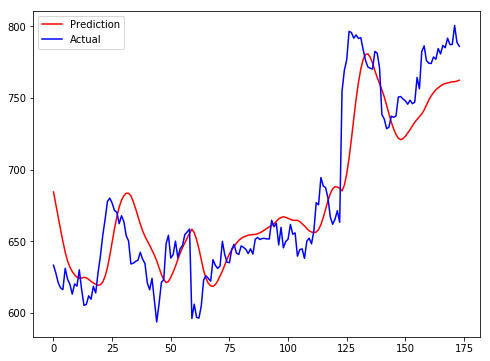

In [78]:
fig, ax = plt.subplots(figsize=(8, 6))

ax.plot(newp,color='red', label='Prediction')
ax.plot(newy_test,color='blue', label='Actual')
ax.legend(loc='best');

## Observations and results:

* This Neural Network model is based on:
  * 3 hidden layers - two off them are LSTM type one is standard Dense
  * The model take 22 past prices into account
  * the activation is relu (max(0,x))
  * The optimiser is "Adam"
  * Loss fnc is the standard "MSE" type
  
* It performs quite well. But it has some limitations that are beyond of the scope of this project.

